# Text Analytics | BAIS:6100
# Homework 3. Basic NLP Techniques & Keyword Analysis

7 questions, 7 points in total

## Instructions

- Fill in the Python statements needed to complete all the questions below. 
- Program everything inside this notebook. 
- Use only one cell per question. 
- Each code cell must be run with no errors.
- Do not contain any unnecessary code in your answer. (Only the final outcome will be regarded as your answer.)
- If the question requests that you store information in a certain variable, use the specific variables name (case sensitive).
- All problems must be solved in a programmable way.
- When you are done, make sure to save your notebook and then click Restart & Run All before subimission to create a clean version.

## Questions

*** Note that you will have to import some modules needed to complete this homework and also reuse some of the user-defined functions you have used at class. 

1\. (0.5 pts) Read all the twelve CSV files in the `classdata/tweets` folder, the file names of which start with *tweets_happy_*, and create a dataframe `df` that contains all tweets from each file. Note that you do not have to create random samples from each month. Each tweet text in the data has a hashtag *#happy*. Finally, explicitly convert the types of the two columns `user_name` and `text` of `df` to string in order to ensure that they are strings.  

In [1]:
# Your answer here
import pandas as pd
pd.set_option('display.max_colwidth', 150)

months = ["202012", "202011", "202010", "202009", "202008", "202007", 
          "202006", "202005", "202004", "202003", "202002", "202001"]

hashtag = "happy"

df = pd.DataFrame()
for month in months:
    dftmp = pd.read_csv("classdata/tweets/tweets_{}_{}.csv".format(hashtag, month), sep="\t", quoting=3)
    df = pd.concat([df, dftmp])
    print("{}: {:,}".format(month, len(dftmp)))

print("Total number of tweets in df: {:,}\n".format(len(df)))

df.user_name = df.user_name.astype(str)
df.text = df.text.astype(str)

202012: 3,933
202011: 4,773
202010: 4,356
202009: 8,287
202008: 8,803
202007: 8,771
202006: 10,188
202005: 13,143
202004: 8,110
202003: 9,099
202002: 7,767
202001: 7,474
Total number of tweets in df: 94,704



In [2]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df

,created_at,user_screen_name,user_name,text
0,Thu Dec 31 23:00:11 +0000 2020,thesoundunique,The Sound Unique,#2021 #Anno #Buon #Buon2021 #BuonAnno #BuonAnnoNuovo #Felice #Felice2021 #FeliceAnno #FeliceAnnoNuovo #Happy… https://t.co/kfiXQDQMe2
1,Thu Dec 31 23:01:18 +0000 2020,TelejobETH,Telejob,The Telejob team wishes you a #Happy New Year! 🎇#Happynewyear #2021 @ETH @AV_ETH https://t.co/g5OuLF8iaA
2,Thu Dec 31 23:01:54 +0000 2020,puc_bag,puc,YIHAAAAAAAAHappy &amp; Healthy 2021 to all of you ❤️⁠#newyear #newyearseve #nye #celebrate #happy #party #2021… https://t.co/y7NhwtYeTK
3,Thu Dec 31 23:02:41 +0000 2020,BethFratesMD,"Beth Frates, MD",RT @KariJoys: #Thankful people are #Happy! #JoyTrain #Joy #Love #Gratitude #GoldenHearts #IAM #Quote #MentalHealth #Mindfulness #ChooseLo…
4,Thu Dec 31 23:08:28 +0000 2020,Sweetestmoonuk,Lizzie 😁(Sweetestmoondust) 😁,#life #lifestyle#love #happy #thoughts #CerebralPalsy #happynewyear2021 https://t.co/xkyYpuBWjs https://t.co/NePK7LtHjA
...,...,...,...,...
7469,Wed Jan 01 10:46:24 +0000 2020,AndyFos78716277,Andy Foster,Today is 1st January 2020; and i thank God for such a fresh blessings #HaPpY nEw 2020...
7470,Wed Jan 01 10:46:44 +0000 2020,AanandWagh,Aanand Sarjerao Wagh,REBOOTED.Happy New Year 2020 🤩..#happynewyear #hny2020 #rebooted #happy #positivevibes #milestones #HappyTiger… https://t.co/exQFo7z4Ao
7471,Wed Jan 01 10:47:53 +0000 2020,arifsubandrio,arifsubandrio,@geruss_dan @cryptoraves @aditya73759102 @Putrie666_ @Dwyuni1 @Koplak28694375 #Happy New Year 2020
7472,Wed Jan 01 10:54:02 +0000 2020,DrM_Ashraf,މުޙައްމަދު އަޝުރަފު,RT @immaamir: @haaboli @ali20waheed @raajjemv Good point. Minister kindly Think twice before take a decision. #Happy Newyear 2020 😊


In [3]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
len(df) == 94704     # Expected output: True

True

2\. (1 pt) Add new columns `tagged_words`, `subjectivity`, and `user_gender` to `df`. It may take several minutes to run the cell. 

In [4]:
# Your answer here
import gender_guesser.detector as gender
import nltk
from textblob import TextBlob

df["words"] = df.text.apply(lambda x: nltk.word_tokenize(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))
df["subjectivity"] = df.text.apply(lambda x: TextBlob(x).sentiment.subjectivity)

def predict_gender(detector, name):
    if len(name.split()) == 0:
        return "unknown"
    
    first_name = name.split()[0]               # Take the first name.
    
    if first_name.startswith("Ms") | first_name.startswith("Mrs") | first_name.startswith("Miss"):
        return "female"
    if first_name.startswith("Mr"):
        return "male"
    
    user_gender = detector.get_gender(first_name)
    
    if user_gender == "mostly_female":
        return "female"
    elif user_gender == "mostly_male":
        return "male"
    
    return user_gender

d = gender.Detector(case_sensitive=False)
df["user_gender"] = df.user_name.apply(lambda x: predict_gender(d, x))

In [5]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
df[["text", "tagged_words", "subjectivity", "user_name", "user_gender"]]

,text,tagged_words,subjectivity,user_name,user_gender
0,#2021 #Anno #Buon #Buon2021 #BuonAnno #BuonAnnoNuovo #Felice #Felice2021 #FeliceAnno #FeliceAnnoNuovo #Happy… https://t.co/kfiXQDQMe2,"[(#, #), (2021, CD), (#, #), (Anno, NNP), (#, #), (Buon, NNP), (#, #), (Buon2021, NNP), (#, #), (BuonAnno, NNP), (#, #), (BuonAnnoNuovo, NNP), (#,...",0.000000,The Sound Unique,female
1,The Telejob team wishes you a #Happy New Year! 🎇#Happynewyear #2021 @ETH @AV_ETH https://t.co/g5OuLF8iaA,"[(The, DT), (Telejob, NNP), (team, NN), (wishes, NNS), (you, PRP), (a, DT), (#, #), (Happy, JJ), (New, NNP), (Year, NN), (!, .), (🎇, JJ), (#, #), ...",0.727273,Telejob,unknown
2,YIHAAAAAAAAHappy &amp; Healthy 2021 to all of you ❤️⁠#newyear #newyearseve #nye #celebrate #happy #party #2021… https://t.co/y7NhwtYeTK,"[(YIHAAAAAAAAHappy, NNP), (&, CC), (amp, NN), (;, :), (Healthy, NNP), (2021, CD), (to, TO), (all, DT), (of, IN), (you, PRP), (❤️⁠, VBP), (#, #), (...",0.750000,puc,unknown
3,RT @KariJoys: #Thankful people are #Happy! #JoyTrain #Joy #Love #Gratitude #GoldenHearts #IAM #Quote #MentalHealth #Mindfulness #ChooseLo…,"[(RT, NNP), (@, NNP), (KariJoys, NNP), (:, :), (#, #), (Thankful, JJ), (people, NNS), (are, VBP), (#, #), (Happy, JJ), (!, .), (#, #), (JoyTrain, ...",0.600000,"Beth Frates, MD",female
4,#life #lifestyle#love #happy #thoughts #CerebralPalsy #happynewyear2021 https://t.co/xkyYpuBWjs https://t.co/NePK7LtHjA,"[(#, #), (life, NN), (#, #), (lifestyle, JJ), (#, #), (love, NN), (#, #), (happy, JJ), (#, #), (thoughts, NNS), (#, #), (CerebralPalsy, NNP), (#, ...",1.000000,Lizzie 😁(Sweetestmoondust) 😁,female
...,...,...,...,...,...
7469,Today is 1st January 2020; and i thank God for such a fresh blessings #HaPpY nEw 2020...,"[(Today, NN), (is, VBZ), (1st, CD), (January, NNP), (2020, CD), (;, :), (and, CC), (i, VB), (thank, NN), (God, NNP), (for, IN), (such, JJ), (a, DT...",0.613636,Andy Foster,male
7470,REBOOTED.Happy New Year 2020 🤩..#happynewyear #hny2020 #rebooted #happy #positivevibes #milestones #HappyTiger… https://t.co/exQFo7z4Ao,"[(REBOOTED.Happy, JJ), (New, NNP), (Year, NN), (2020, CD), (🤩, NNP), (.., NNP), (#, #), (happynewyear, JJ), (#, #), (hny2020, JJ), (#, #), (reboot...",0.727273,Aanand Sarjerao Wagh,unknown
7471,@geruss_dan @cryptoraves @aditya73759102 @Putrie666_ @Dwyuni1 @Koplak28694375 #Happy New Year 2020,"[(@, JJ), (geruss_dan, NN), (@, NNP), (cryptoraves, VBZ), (@, NNP), (aditya73759102, NN), (@, NNP), (Putrie666_, NNP), (@, NNP), (Dwyuni1, NNP), (...",0.727273,arifsubandrio,unknown
7472,RT @immaamir: @haaboli @ali20waheed @raajjemv Good point. Minister kindly Think twice before take a decision. #Happy Newyear 2020 😊,"[(RT, NNP), (@, NNP), (immaamir, NN), (:, :), (@, JJ), (haaboli, NN), (@, NNP), (ali20waheed, VBD), (@, NNP), (raajjemv, VBD), (Good, JJ), (point,...",0.833333,މުޙައްމަދު އަޝުރަފު,unknown


3\. (1 pt) List the top-50 most common words in the `text` column along with their frequencies, considering both the global and local stopwords. You will need to define your own local stopwords that suit the *#happy* corpus. You may treat emojis and URLs as normal words. 

*** Make sure NOT to remove important keywords by including them in your local stopwords.

In [6]:
# Your answer here
from collections import Counter
import string

def get_counter(dataframe, stopwords=[], target_tag=None):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            ##########################################################
            # Check if the word is a stopword.
            ##########################################################
            if word in stopwords:
                continue

            if target_tag is None:
                word_set.add(word)
            else:
                ##########################################################
                # Check the tag
                ##########################################################
                if tag.startswith(target_tag):
                    word_set.add(word)
                else:
                    continue

        counter.update(word_set)
        
    return counter

global_stopwords = nltk.corpus.stopwords.words("english") 
local_stopwords = [c for c in string.punctuation] +\
                  ['’', '``', '…', '..', '...', "''", '‘', '“', '”', "'m", "'re", "'s", "'ve", 'amp', 'https', "n't", 'rt', 
                   'happy', "'happy", 'h…']
counter_overall = get_counter(df, global_stopwords+local_stopwords)
counter_overall.most_common(50)

[('taeyeon', 11843),
 ('life', 11656),
 ('태연', 9452),
 ('love', 8597),
 ('health', 8325),
 ('birthday', 6722),
 ('day', 5989),
 ('girlsgeneration', 5480),
 ('소녀시대', 4804),
 ('live', 4797),
 ('new', 4016),
 ('healthy', 3857),
 ('summer', 3784),
 ('video', 3706),
 ('kst', 3580),
 ('309ktyss', 3529),
 ('beauty', 3333),
 ('station', 3176),
 ('beautiful', 3077),
 ('good', 3065),
 ('smtownglobal', 3051),
 ('smile', 3048),
 ('happy…', 2927),
 ('version', 2874),
 ('holy', 2731),
 ('bali', 2713),
 ('gedeprama', 2709),
 ('🎬', 2687),
 ('1', 2662),
 ('peace', 2632),
 ('innerharmony', 2609),
 ('6pm', 2585),
 ('courtesy', 2570),
 ('like', 2559),
 ('fun', 2457),
 ('melon', 2341),
 ('2020.06.26', 2315),
 ('happiness', 2138),
 ('morning', 2133),
 ('gede_prama', 2065),
 ('cute', 2029),
 ('today', 1949),
 ('make', 1923),
 ('genie', 1881),
 ('❤️', 1720),
 ('may', 1716),
 ('joytrainphoto', 1711),
 ('💜', 1684),
 ('friends', 1670),
 ('one', 1630)]

4\. (1 pt) Select from `df` the rows with the subjectivity score larger than or equal to 0.5 and posted by female users. List the top-50 most common words in the the selected text along with their frequencies, reusing the global and local stopwords defined in question 3. 

In [7]:
# Your answer here
df_tmp = df[(df.subjectivity >= 0.5) & (df.user_gender == "female")]
counter = get_counter(df_tmp, global_stopwords+local_stopwords)
counter.most_common(50)

[('love', 1346),
 ('day', 910),
 ('taeyeon', 672),
 ('beauty', 631),
 ('healthy', 605),
 ('birthday', 571),
 ('태연', 554),
 ('good', 495),
 ('holy', 472),
 ('bali', 467),
 ('gedeprama', 467),
 ('gede_prama', 465),
 ('courtesy', 461),
 ('innerharmony', 459),
 ('life', 449),
 ('peace', 411),
 ('beautiful', 401),
 ('smile', 398),
 ('live', 384),
 ('morning', 346),
 ('today', 345),
 ('new', 337),
 ('girlsgeneration', 337),
 ('happy…', 313),
 ('like', 308),
 ('소녀시대', 303),
 ('happiness', 296),
 ('joytrainphoto', 288),
 ('summer', 285),
 ('friends', 284),
 ('cute', 284),
 ('make', 280),
 ('video', 273),
 ('pinterest', 255),
 ('joytrain', 254),
 ('family', 241),
 ('fun', 236),
 ('photo', 230),
 ('great', 213),
 ('309ktyss', 208),
 ('station', 206),
 ('sunday', 206),
 ('one', 205),
 ('smtownglobal', 203),
 ('kst', 200),
 ('everyone', 196),
 ('version', 194),
 ('nature', 193),
 ('❤️', 184),
 ('may', 180)]

5\. (2 pts) Using a regular expression, add a new column `hashtags` to `df`, such that each value in the column contains a list of hashtags in the `text` column value (refer to the in-class example in Module 2). List the top-50 most common <b>hashtags</b> in the `text` column along with their frequencies, considering no stopwords. When counting each hashtag, treat them as lowercase to avoid case variations. For example, the first three tuples in the list look as follows.

(Hint: you will have to modify the body of the `get_counter` function, such that it can iterate over the `hashtags` column, not over the `tagged_words` column.)

In [8]:
# Your answer here
import re
df["hashtags"] = df.text.str.findall("#[A-Za-z0-9_]+")

def get_counter_hashtags(dataframe):
    counter = Counter()
    
    for l in dataframe.hashtags:
        set_tmp = set()

        for item in l:
            item = item.lower()
            set_tmp.add(item)

        counter.update(set_tmp)
        
    return counter

counter_hashtags = get_counter_hashtags(df)
counter_hashtags.most_common(50)

[('#happy', 93879),
 ('#taeyeon', 10982),
 ('#life', 9631),
 ('#health', 8226),
 ('#love', 6537),
 ('#girlsgeneration', 4303),
 ('#healthy', 3716),
 ('#beauty', 3178),
 ('#holy', 2715),
 ('#bali', 2713),
 ('#gedeprama', 2709),
 ('#innerharmony', 2609),
 ('#peace', 2451),
 ('#smile', 2445),
 ('#station', 2312),
 ('#1', 2014),
 ('#beautiful', 1962),
 ('#cute', 1918),
 ('#joytrainphoto', 1716),
 ('#instagood', 1680),
 ('#happiness', 1604),
 ('#fun', 1480),
 ('#photooftheday', 1255),
 ('#birthday', 1247),
 ('#family', 1184),
 ('#fashion', 1159),
 ('#joytrain', 1136),
 ('#joy', 1036),
 ('#art', 986),
 ('#thanksgiving', 875),
 ('#day', 859),
 ('#streetstyle', 851),
 ('#follow', 831),
 ('#stayathome', 819),
 ('#photography', 796),
 ('#th', 793),
 ('#thanksgiving2020', 788),
 ('#staycation', 779),
 ('#amazing', 762),
 ('#moda', 759),
 ('#goodread', 758),
 ('#motivation', 723),
 ('#friends', 709),
 ('#me', 703),
 ('#weekend', 700),
 ('#suga', 691),
 ('#nature', 681),
 ('#hobi', 681),
 ('#map_of

6\. (1 pt) Draw a word cloud that visualizes the top-100 most common <b>hashtags</b>. 

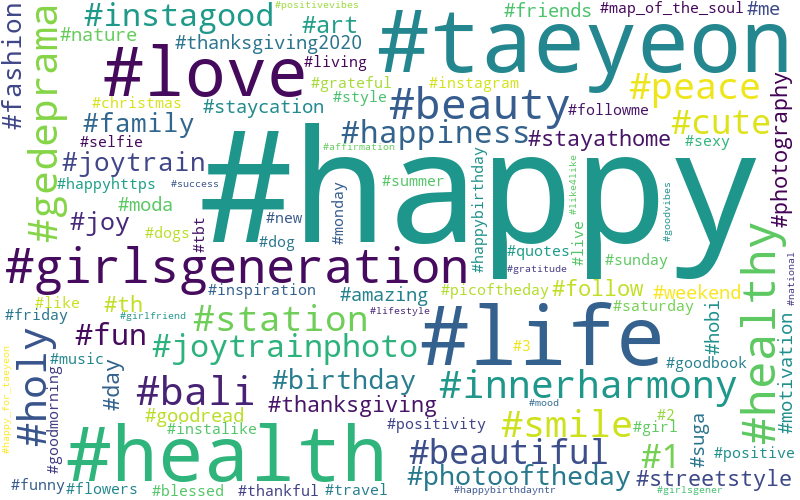

In [9]:
# Your answer here
from IPython.display import Image
from wordcloud import WordCloud 

def draw_wordcloud(counter, image_file_name, max_words=100):
    wc = WordCloud(background_color="white", max_words=max_words, width=800, height=500)
    wc.generate_from_frequencies(counter)
    wc.to_file(image_file_name)
    display(Image(filename=image_file_name))
    
draw_wordcloud(counter_hashtags, "outcome/hw_wordcloud.png", 100)

7\. (0.5 pts) Get the frequency of the hashtag '*#happybirthday*' and save it in the variable `ans7`. 

In [10]:
# Your answer here
ans7 = counter_hashtags["#happybirthday"]

In [11]:
# Check your answer here. (Do not make any change to this cell. Just run this cell.)
ans7

362

### Now that you have completed all the questions, click Kernel > Restart & Run All to creat a clean version of this notebook and check if all cells have run as expected. 